fuller

In [2]:
from binance.client import Client

In [3]:
api_key = "oaC26VRtbUGCw4uLXukpPcwuOHjarI37psYKKwBUQXf1ysr4wewQGWgJbDzCiZnn"
api_secret = "gpQU2LK785lCoqPfDLAEdqT6ka2k2Y8P1gEiySa0zKHMVSFQmeWbdNyqC3rxQoX7"
client = Client(api_key, api_secret)

In [4]:
symbols = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT','EOSUSDT','XLMUSDT','MATICUSDT','SOLUSDT','NEOUSDT','LINKUSDT','NEOUSDT','LTCUSDT','TRXUSDT','ATOMUSDT','UNIUSDT','NEOUSDT','VETUSDT','DOTUSDT','NEARUSDT']
interval = Client.KLINE_INTERVAL_1DAY

In [5]:
start_date = '1 Apr, 2022' 
end_date = '1 Apr, 2023' 

In [6]:
import pandas as pd

In [7]:
data1D = []

for symbol in symbols:
    klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1DAY, start_date, end_date)
    df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df = df[['timestamp', 'close']]
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df.columns = [symbol]
    data1D.append(df)

In [8]:
df1D = pd.concat(data1D, axis=1)

In [9]:
df1H.to_csv('1Hdata.csv')

NameError: name 'df1H' is not defined

In [18]:
df1D = df1D.set_index('timestamp')

In [19]:
df1D

,BTCUSDT,ETHUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,EOSUSDT,XLMUSDT,MATICUSDT,SOLUSDT,NEOUSDT,LINKUSDT,NEOUSDT.1,LTCUSDT,TRXUSDT,ATOMUSDT,UNIUSDT,NEOUSDT.2,VETUSDT,DOTUSDT,NEARUSDT
timestamp,,,,,,,,,,,,,,,,,,,,
2022-04-01,46283.49,3455.21,0.8277,1.1650,0.14130,2.838,0.2325,1.6950,134.52,28.03,17.340,28.03,124.80,0.07494,29.410,11.580,28.03,0.08108,22.070,14.740
2022-04-02,45811.00,3443.77,0.8240,1.1550,0.13870,2.786,0.2331,1.6530,132.49,27.53,17.400,27.53,124.80,0.07322,31.300,11.650,27.53,0.07716,22.610,14.825
2022-04-03,46407.35,3521.91,0.8432,1.1860,0.14660,2.840,0.2370,1.6880,136.90,28.00,18.080,28.00,128.70,0.07312,31.970,11.870,28.00,0.08262,23.210,16.813
2022-04-04,46580.51,3519.50,0.8260,1.2120,0.14850,2.890,0.2319,1.6480,132.14,27.18,17.500,27.18,124.80,0.07070,30.850,11.540,27.18,0.07890,22.890,17.115
2022-04-05,45497.55,3406.99,0.8164,1.1710,0.17270,2.753,0.2248,1.5920,126.87,25.76,16.740,25.76,122.70,0.06928,29.290,11.120,25.76,0.07584,21.780,16.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,27261.07,1772.99,0.5144,0.3681,0.07381,1.113,0.0977,1.0860,20.45,12.72,6.947,12.72,89.13,0.06418,11.212,5.808,12.72,0.02242,6.056,1.883
2023-03-29,28348.60,1793.07,0.5425,0.3811,0.07557,1.149,0.1017,1.1223,21.10,13.22,7.382,13.22,91.31,0.06433,11.430,5.945,13.22,0.02321,6.183,2.000
2023-03-30,28028.53,1793.61,0.5319,0.3761,0.07422,1.190,0.1064,1.0930,20.55,12.51,7.233,12.51,89.06,0.06481,11.149,5.897,12.51,0.02287,6.122,1.927


In [20]:
token_list = df1D.columns

In [21]:
import numpy as np
df1D=df1D.astype(np.float64)

In [23]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np
import pandas as pd
#df1D = pd.DataFrame(df1H)
t_results_table = pd.DataFrame(columns=token_list, index=token_list) # Initizalize empty datafrane with token_list as both columns and indexes
p_results_table = pd.DataFrame(columns=token_list, index=token_list) # Initizalize empty datafrane with token_list as both columns and indexes

# Loop every column and every row
for row in token_list:
    for column in token_list:
        # If column is the same as row then set NaN as the result of the ADF test
        if row == column: 
            t_results_table[column][row] = np.nan
            p_results_table[column][row] = np.nan
        else: 
            regression = sm.OLS(df1D[row], sm.add_constant(df1D[column])).fit().params # Apply OLS     
            residual = df1D[row]-regression[1]*df1D[column]-regression[0] # Build the residual price series
            adf_results = adfuller(residual) # Calculate the ADF test on the residuals
            t_results_table[column][row] = adf_results[0] # Save the results to table
            p_results_table[column][row] = adf_results[1] # Save the results to table

In [24]:
t_results_table.head(len(token_list))

,BTCUSDT,ETHUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,EOSUSDT,XLMUSDT,MATICUSDT,SOLUSDT,NEOUSDT,LINKUSDT,NEOUSDT.1,LTCUSDT,TRXUSDT,ATOMUSDT,UNIUSDT,NEOUSDT.2,VETUSDT,DOTUSDT,NEARUSDT
BTCUSDT,NaN,-1.567656,-1.55278,-1.045924,-2.49159,-1.621395,-1.165921,-2.193088,-0.381009,-3.367822,-1.813417,-3.367822,-1.86906,-4.373773,-0.951477,-1.294764,-3.367822,-1.841624,-1.255322,-1.188544
ETHUSDT,-2.067406,NaN,-2.522039,-1.289217,-2.884541,-2.634615,-2.012472,-1.938388,-1.385698,-3.130972,-2.489547,-3.130972,-1.926682,-3.90208,-1.595976,-1.555449,-3.130972,-2.878726,-1.607974,-2.463225
XRPUSDT,-2.39224,-2.627564,NaN,-1.502185,-3.331264,-2.521803,-1.387593,-2.668628,-1.210853,-2.226255,-2.445093,-2.226255,-2.576144,-3.477441,-2.374735,-1.868004,-2.226255,-1.802926,-1.707823,-2.261092
ADAUSDT,-1.218591,-1.730668,-1.308918,NaN,-2.071865,-2.669505,-2.78337,-2.533031,-4.062989,-0.718472,-1.51024,-0.718472,-2.468594,-4.772937,-1.382413,-1.926079,-0.718472,-3.072013,-3.218949,-3.267872
DOGEUSDT,-2.06325,-3.048192,-3.331734,-1.962688,NaN,-2.915721,-2.02763,-2.939939,-1.917905,-2.967843,-3.320549,-2.967843,-2.148667,-3.108124,-2.793465,-2.617513,-2.967843,-3.340943,-3.111824,-2.008909
EOSUSDT,-1.421419,-2.289362,-2.113493,-2.75175,-2.993841,NaN,-2.143076,-1.772535,-2.044695,-2.491196,-3.289241,-2.491196,-1.607491,-4.746879,-1.781712,-2.116449,-2.491196,-2.852563,-2.857878,-2.370905
XLMUSDT,-0.928126,-1.563398,-1.123527,-2.418372,-1.779561,-2.275682,NaN,-2.47026,-3.224994,-1.027097,-1.619805,-1.027097,-2.122712,-5.000494,-1.38064,-1.81023,-1.027097,-1.895022,-2.560592,-4.236862
MATICUSDT,-1.917223,-1.562513,-1.826868,-1.815638,-1.882972,-1.617604,-2.108235,NaN,-1.848269,-1.531469,-1.260895,-1.531469,-2.556767,-2.964817,-1.51036,-1.290869,-1.531469,-1.301465,-1.544673,-1.830912
SOLUSDT,-0.921038,-1.362349,-0.602836,-3.96742,-2.713927,-2.141422,-2.82447,-3.570828,NaN,-0.00472,-2.29733,-0.00472,-2.950324,-3.77484,-0.905471,-1.972193,-0.00472,-2.49629,-2.562007,-6.487162
NEOUSDT,-4.21772,-3.853666,-1.646162,-0.900988,-3.643878,-3.097634,-0.937164,-2.335783,-0.637418,NaN,-1.482896,-3.788202,-3.375259,-4.728275,-1.550584,-1.747748,-3.788202,0.142747,-0.228581,-0.288739


Now, we will categorize the results. We will use the critical values of the t-statistics and the p-value to determine if the specific combination is very likely to be a cointegrating pair, likely to be a cointegrating pair or not likely to be a cointegrating pair.

"1" - The pair is very likely to be cointegrating. p-value < 0.05 & t-stat > 99% certainty.
"2" - The pair is very likely to be cointegrating. p-value < 0.05 & t-stat > 95% certainty.
"nan" - Else

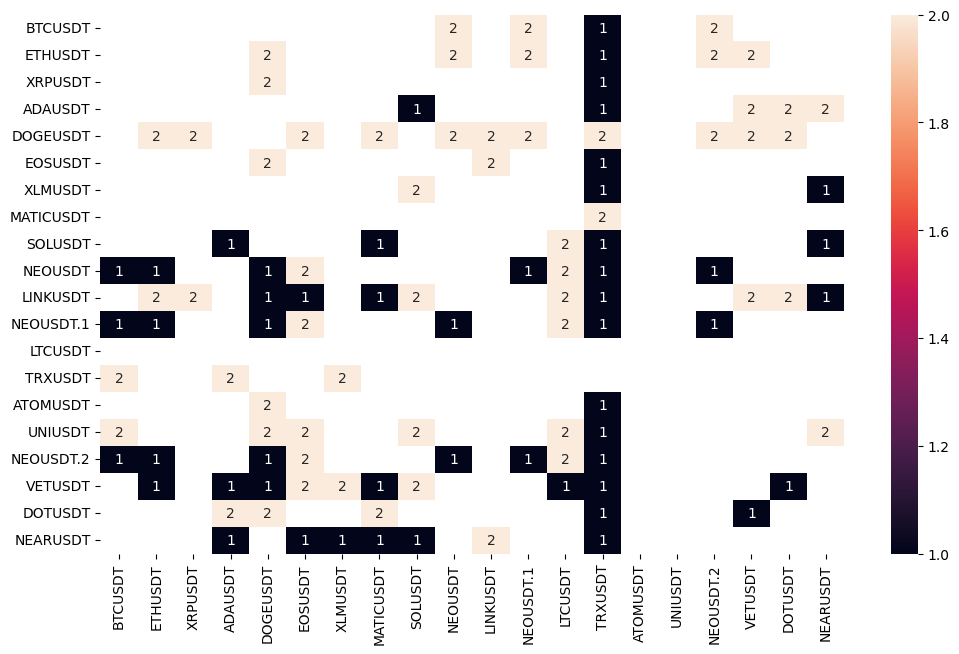

In [27]:
# Define function that gets a cell (value) and compares to critical values of the ADF test
import matplotlib.pyplot as plt
def tstat(cell):
    if cell < adf_results[4]['1%']:
        ret = 1
    elif cell < adf_results[4]['5%']:
        ret = 2
    else:
        ret = np.nan
    return ret

def convp(cell):
    if cell < 0.05:
        ret = 1
    else:
        ret = np.nan
    return ret

# Apply tstat function to every cell on table
tstat_table = t_results_table.applymap(tstat)
pvalue_table = p_results_table.applymap(convp)

results_table = pd.DataFrame(tstat_table.values*pvalue_table.values, columns=tstat_table.columns, index=tstat_table.index)

# Plot results with Seaborn
import seaborn as sns
fig = plt.figure(figsize=(12,7))
ax = sns.heatmap(results_table.values.astype(float), xticklabels = tstat_table.columns, yticklabels = tstat_table.columns, annot = True)

We can easily see that there are many pairs that appear to be cointegrating. Among them 15 with 99% probability based on the Augmented Dickey-Fuller test.

# Hurst Exponent

In [88]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts,l=10):
    # Create the range of lag values
    lags = range(2, l)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std((ts.shift(-lag)-ts)**2)) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0



In [89]:
Hurst_results_table = pd.DataFrame(columns=token_list, index=token_list)



In [92]:
for row in token_list:
    for column in token_list:
        if row == column:
            Hurst_results_table[column][row] = np.nan
        else:
            regression = sm.OLS(df1D[row], sm.add_constant(df1D[column])).fit().params    
            residual = df1D[row]-regression[1]*df1D[column]-regression[0]
            hurst_results = hurst(residual)
            Hurst_results_table[column][row] = hurst_results
        

In [93]:
Hurst_results_table.head()

,BTCUSDT,ETHUSDT,XRPUSDT,ADAUSDT,DOGEUSDT,EOSUSDT,XLMUSDT,MATICUSDT,SOLUSDT,NEOUSDT,LINKUSDT,NEOUSDT.1,LTCUSDT,TRXUSDT,ATOMUSDT,UNIUSDT,NEOUSDT.2,VETUSDT,DOTUSDT,NEARUSDT
BTCUSDT,NaN,0.833971,1.025912,0.941475,0.990393,0.971183,0.96352,1.145383,1.187547,0.445141,0.655704,0.445141,1.160318,1.186,1.044909,0.929586,0.445141,0.885184,1.023715,0.960839
ETHUSDT,0.804197,NaN,1.248934,0.862288,0.901525,1.066321,1.160435,1.038923,1.33597,0.464691,0.798397,0.464691,1.130044,1.180328,0.702766,0.732362,0.464691,1.053357,0.989508,0.880637
XRPUSDT,0.899943,1.126003,NaN,0.927388,0.989841,1.101699,0.9163,1.095211,0.903509,0.805291,0.93309,0.805291,0.934144,1.018441,1.073168,0.943166,0.805291,0.897554,0.959552,0.847631
ADAUSDT,0.718306,0.687613,0.995238,NaN,0.992444,1.048294,0.789312,0.833578,0.576067,0.38792,0.623191,0.38792,0.837958,0.980503,0.578676,0.523723,0.38792,0.456992,0.543098,0.889939
DOGEUSDT,1.000229,0.95693,1.014037,1.015082,NaN,0.986658,1.033163,1.03111,0.990125,0.980179,0.986722,0.980179,0.999754,1.007993,0.87428,0.885894,0.980179,0.989886,0.984437,0.96548


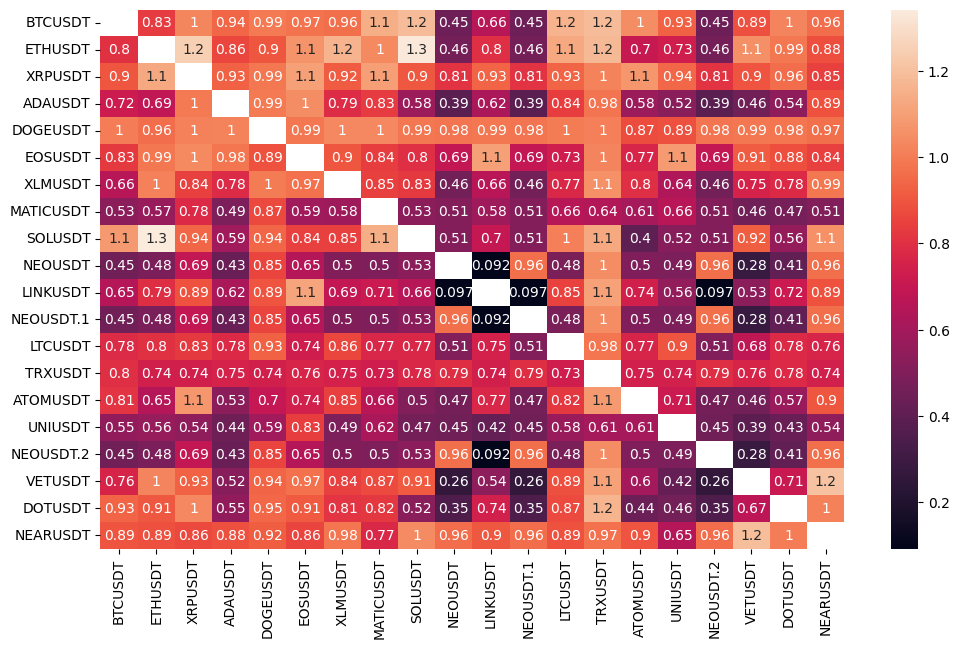

In [94]:
fig = plt.figure(figsize=(12,7))
ax = sns.heatmap(Hurst_results_table.values.astype(float), xticklabels = Hurst_results_table.columns, yticklabels = Hurst_results_table.columns, annot = True)

# johansen test

In [99]:
import statsmodels
import itertools

# Initialize the results dataframe where we will store the Trace and the Eigen Vectors of the Johansen Test
johansen_results = pd.DataFrame(columns=['Trace', 'Eigen Vector'])


In [110]:

# Loop the number of dimensions (number of tokens to combine)
for dim in range(3,10):

    print ('Calulating for dim ' + str(dim))
    
    # Get every possible combination of tokens
    combinations = list(itertools.combinations(df1D.columns, dim))
    
    # Create a results dataframe for the specific dim we are looping
    dim_results_df = pd.DataFrame(columns=['Trace', 'Eigen Vector'], index=combinations)
    
    # Loop over the combinations
    for counter, row in enumerate(combinations):
        
        # Perform the Johansen test on specific group of tokens
        jres1 = statsmodels.tsa.vector_ar.vecm.coint_johansen(df1D[list(row)], 0, 2)
        
        # Check if the trace value is bigger than the 99% critical value for r=dim
        if jres1.lr1[-1] > jres1.cvt[-1][-1]:
            
            # Save the Trace results to dim_results_df
            dim_results_df['Trace'][row] = jres1.lr1[-1]
            
            # Save the first eigenvector to dim_results_df, limit to 6 decmials
            dim_results_df['Eigen Vector'][row] = np.around(jres1.evec[:,0], decimals=6)
        
        else:
        
            # If not at least 99% sure save the Trace value as 0, we will discard it later
            dim_results_df['Trace'][row] = 0
            dim_results_df['Eigen Vector'][row] = 0
        
    # Clean DataFrame, keep only the rows where Trace value is not 0    
    relevant_df = dim_results_df[dim_results_df['Trace']!=0]
    #relevant_df = pd.DataFrame(relevant_df)
    #johansen_results = pd.DataFrame(johansen_results)
    # Append the resulting DataFrame to the general DataFrame johansen_results
    #johansen_results= johansen_results.concat(relevant_df)
    johansen_results = pd.concat([johansen_results, relevant_df], ignore_index=True)

Calulating for dim 3


LinAlgError: Singular matrix

In [106]:
sorted_df = johansen_results.sort_values(by=['Trace'], ascending=False)


In [107]:
sorted_df

,Trace,Eigen Vector
